<h2>LOGISTIC REGRESSION MAINLY DEPENDS ON SIGMOID CURVE WHICH DECIDES YES OR NO (1 OR 0)</h2>
<h3>THE PREDICTED VALUE OF Y IS CONSIDERED AS <0.5 AS NO AND >0.5 AS YES</h3>
<img src="../../images/logistic-regression.png" width="450px">


<h2>The multiplication of all the regression points which comes between 0 and 1 of a regression line is called as Likelihood</h2>
<p>The Yes=(1-No) thats why we are making the multiplication of the Yes value indirectly</p>
<img src="../../images/likelihood.jpg" width="600px">

<h2>A best regression line is found by the maximum Likelihood</h2>
<img src="../../images/best-likelihood.jpg" width="600px">


In [142]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Wine Quality Red dataset
file = pd.read_csv("../../datasets/Social_Network_Ads.csv")

# Separate features and target
X = file.iloc[:, :-1].values
y = file.iloc[:, -1].values

# Feature scaling for more accuracy on X's Data
ss_X = StandardScaler()
X = ss_X.fit_transform(X)

print(X)
print(y)

# Split the dataset into an 80-20 training-test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


[[-1.78179743 -1.49004624]
 [-0.25358736 -1.46068138]
 [-1.11320552 -0.78528968]
 [-1.01769239 -0.37418169]
 [-1.78179743  0.18375059]
 [-1.01769239 -0.34481683]
 [-1.01769239  0.41866944]
 [-0.54012675  2.35674998]
 [-1.20871865 -1.07893824]
 [-0.25358736 -0.13926283]
 [-1.11320552  0.30121002]
 [-1.11320552 -0.52100597]
 [-1.6862843   0.47739916]
 [-0.54012675 -1.51941109]
 [-1.87731056  0.35993973]
 [-0.82666613  0.30121002]
 [ 0.89257019 -1.3138571 ]
 [ 0.70154394 -1.28449224]
 [ 0.79705706 -1.22576253]
 [ 0.98808332 -1.19639767]
 [ 0.70154394 -1.40195167]
 [ 0.89257019 -0.60910054]
 [ 0.98808332 -0.84401939]
 [ 0.70154394 -1.40195167]
 [ 0.79705706 -1.37258681]
 [ 0.89257019 -1.46068138]
 [ 1.08359645 -1.22576253]
 [ 0.89257019 -1.16703281]
 [-0.82666613 -0.78528968]
 [-0.63563988 -1.51941109]
 [-0.63563988  0.12502088]
 [-1.01769239  1.97500684]
 [-1.59077117 -1.5781408 ]
 [-0.92217926 -0.75592482]
 [-1.01769239  0.59485858]
 [-0.25358736 -1.25512738]
 [-0.44461362 -1.22576253]
 

In [143]:
# import model
from sklearn.linear_model import LogisticRegression
# create model
classifier = LogisticRegression(random_state=0)
# train model
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [144]:
# predict single data 
single_pred = classifier.predict(ss_X.transform([[28,86000]]))
print(single_pred)

[0]


In [145]:
# predict test data 
y_pred = classifier.predict(X_test)

In [146]:
# all value predictions for the LogisticRegression(random_state=0) model

# print the predicted results with nice looking output
# displaying the headings 
headings = ['Data to test X1', 'Data to test X2', 'Actual', 'Predicted']
print('{:<20} {:<20} {:<20} {:<20}'.format(*headings))
# displaying the data
data_comparison = np.concatenate((ss_X.inverse_transform(X_test), y_test.reshape(-1, 1), y_pred.reshape(-1, 1)), axis=1)
for row in data_comparison:
    print('{:<20.2f} {:<20.2f} {:<20.2f}  {:<20.2f}'.format(*row))

Data to test X1      Data to test X2      Actual               Predicted           
36.00                33000.00             0.00                  0.00                
39.00                61000.00             0.00                  0.00                
36.00                118000.00            1.00                  1.00                
39.00                122000.00            1.00                  1.00                
26.00                118000.00            0.00                  0.00                
38.00                65000.00             0.00                  0.00                
20.00                36000.00             0.00                  0.00                
49.00                89000.00             1.00                  1.00                
31.00                18000.00             0.00                  0.00                
48.00                141000.00            0.00                  1.00                
34.00                72000.00             0.00                  0.

In [147]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_test, y_pred))

# 41 - Said Correct for Correct prediction 
# 7 - Said Wrong for Correct prediction 
# 6 - Said Correct for Wrong prediction 
# 26 - Said Wrong for Wrong prediction 

# here diagonal shows the correct predictions by the model

[[41  7]
 [ 6 26]]


In [148]:
print(accuracy_score(y_test,y_pred))

# sum of correct predictions = 41 + 26 
# sum of wrong predictions = 7 + 6
# accuracy_score = sum of correct / sum of wrong 

0.8375


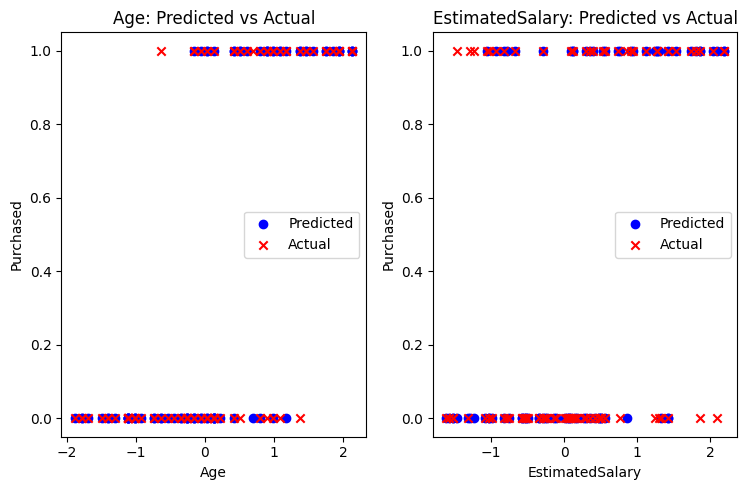

In [149]:
# compare the individual columns of X since X has multiple data with y predicted Purchased by plotting graph
age = X_test[:, 0]
estimated_salary = X_test[:, 1]

# Plotting predicted vs actual for each feature
plt.figure(figsize=(15, 5))

# Age
plt.subplot(1, 4, 1)
plt.scatter(age, y_pred, color='blue', label='Predicted')
plt.scatter(age, y_test, color='red', label='Actual', marker='x')
plt.xlabel('Age')
plt.ylabel('Purchased')
plt.title('Age: Predicted vs Actual')
plt.legend()

# EstimatedSalary
plt.subplot(1, 4, 2)
plt.scatter(estimated_salary, y_pred, color='blue', label='Predicted')
plt.scatter(estimated_salary, y_test, color='red', label='Actual', marker='x')
plt.xlabel('EstimatedSalary')
plt.ylabel('Purchased')
plt.title('EstimatedSalary: Predicted vs Actual')
plt.legend()

plt.tight_layout()
plt.show()